In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn import linear_model,decomposition
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.feature_selection import RFE
from sklearn import svm
from keras.models import Sequential 
from keras.optimizers import SGD
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import pickle
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
%matplotlib inline

Using TensorFlow backend.
C:\Users\vbdon\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1 = pd.read_csv('Final_Development set_With corrected dates and errors_Dimension1.csv',delimiter=';')
df2 = pd.read_csv('Final_Development set_With corrected dates and errors_Dimension2.csv',delimiter=';')

#remove duplicate rows in both dataframe caused during data extraction
df2 = df2.drop_duplicates()
df1 = df1.drop_duplicates()

In [3]:
tf1 = pd.read_csv(r'Test_data_sets_Without_labels_Final/test_dim_1_Without labels_Final.csv',delimiter=';').drop_duplicates()
tf2 = pd.read_csv(r'Test_data_sets_Without_labels_Final/test_dim_2_Without labels_Final.csv',delimiter=';').drop_duplicates()

In [4]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18187 entries, 0 to 18186
Data columns (total 10 columns):
ga.dateHourMinute                    18187 non-null int64
ga.sessionDurationBucket             18187 non-null int64
ga.browser.encoded                   18187 non-null object
ga.operatingSystem.encoded           18187 non-null object
ga.operatingSystemVersion.encoded    18187 non-null object
ga.language.encoded                  18187 non-null object
ga.DeviceInfo.encoded                18187 non-null object
Unique.code                          18187 non-null object
ga.sessionsWithEvent                 18187 non-null int64
Success                              0 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42434 entries, 0 to 42433
Data columns (total 10 columns):
ga.dateHourMinute                    42434 non-null int64
ga.sessionDurationBucket             42434 non-null int64
ga.browser.encoded                   42434 non-null object
ga.operatingSystem.encoded           42434 non-null object
ga.operatingSystemVersion.encoded    42434 non-null object
ga.language.encoded                  42434 non-null object
ga.DeviceInfo.encoded                42434 non-null object
Unique.code                          42434 non-null object
ga.sessionsWithEvent                 42434 non-null int64
Success                              42434 non-null bool
dtypes: bool(1), int64(3), object(6)
memory usage: 3.3+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42435 entries, 0 to 42435
Data columns (total 8 columns):
ga.dateHourMinute                 42435 non-null int64
ga.userType                       42435 non-null object
ga.sessionCount                   42435 non-null int64
ga.userBucket                     42435 non-null int64
ga.sessionDurationBucket          42435 non-null int64
ga.sessionsWithEvent              42435 non-null int64
ga.uniqueDimensionCombinations    42435 non-null int64
Sucess                            42435 non-null bool
dtypes: bool(1), int64(6), object(1)
memory usage: 2.6+ MB


In [6]:
df1.columns = [w.replace('.','_') for w in df1.columns]
df2.columns = [w.replace('.','_') for w in df2.columns]

In [7]:
tf1.columns = [w.replace('.','_') for w in tf1.columns]
tf2.columns = [w.replace('.','_') for w in tf2.columns]

In [8]:
df1.head()

,ga_dateHourMinute,ga_sessionDurationBucket,ga_browser_encoded,ga_operatingSystem_encoded,ga_operatingSystemVersion_encoded,ga_language_encoded,ga_DeviceInfo_encoded,Unique_code,ga_sessionsWithEvent,Success
0,201804031151,1,A6,B2,C44,D30,E1,A6B2C44D30E1,1,False
1,201804141014,3,A4,B2,C42,D54,E1,A4B2C42D54E1,1,False
2,201804141045,1,A4,B2,C49,D53,E1,A4B2C49D53E1,1,False
3,201804231929,2,A3,B2,C51,D13,E1,A3B2C51D13E1,1,False
4,201806061033,1,A6,B2,C44,D31,E1,A6B2C44D31E1,1,False


In [9]:
df2.head()

,ga_dateHourMinute,ga_userType,ga_sessionCount,ga_userBucket,ga_sessionDurationBucket,ga_sessionsWithEvent,ga_uniqueDimensionCombinations,Sucess
0,201803151836,New Visitor,1,79,1,1,1,False
1,201803151838,Returning Visitor,2,30,1,1,1,False
2,201803151841,New Visitor,1,19,220,1,1,False
3,201803151842,New Visitor,1,10,80,1,1,False
4,201803151926,Returning Visitor,2,48,207,1,1,False


In [10]:
df2['Success'] = np.where(df2['Sucess'] == True,1,0)
df1['Success'] = np.where(df1['Success']==True,1,0)
del df2['Sucess']

In [11]:
df1.head()

,ga_dateHourMinute,ga_sessionDurationBucket,ga_browser_encoded,ga_operatingSystem_encoded,ga_operatingSystemVersion_encoded,ga_language_encoded,ga_DeviceInfo_encoded,Unique_code,ga_sessionsWithEvent,Success
0,201804031151,1,A6,B2,C44,D30,E1,A6B2C44D30E1,1,0
1,201804141014,3,A4,B2,C42,D54,E1,A4B2C42D54E1,1,0
2,201804141045,1,A4,B2,C49,D53,E1,A4B2C49D53E1,1,0
3,201804231929,2,A3,B2,C51,D13,E1,A3B2C51D13E1,1,0
4,201806061033,1,A6,B2,C44,D31,E1,A6B2C44D31E1,1,0


In [12]:
df2.head()

,ga_dateHourMinute,ga_userType,ga_sessionCount,ga_userBucket,ga_sessionDurationBucket,ga_sessionsWithEvent,ga_uniqueDimensionCombinations,Success
0,201803151836,New Visitor,1,79,1,1,1,0
1,201803151838,Returning Visitor,2,30,1,1,1,0
2,201803151841,New Visitor,1,19,220,1,1,0
3,201803151842,New Visitor,1,10,80,1,1,0
4,201803151926,Returning Visitor,2,48,207,1,1,0


In [13]:
df1.sort_values('ga_dateHourMinute').head(n=10)

,ga_dateHourMinute,ga_sessionDurationBucket,ga_browser_encoded,ga_operatingSystem_encoded,ga_operatingSystemVersion_encoded,ga_language_encoded,ga_DeviceInfo_encoded,Unique_code,ga_sessionsWithEvent,Success
41315,201803151411,971,A4,B8,C2,D54,E359,A4B8C2D54E359,1,1
40956,201803151413,597,A4,B8,C2,D31,E359,A4B8C2D31E359,1,0
41316,201803151414,971,A4,B8,C2,D54,E359,A4B8C2D54E359,0,1
41317,201803151416,971,A4,B8,C2,D54,E359,A4B8C2D54E359,0,1
41318,201803151418,971,A4,B8,C2,D54,E359,A4B8C2D54E359,0,1
41319,201803151420,971,A4,B8,C2,D54,E359,A4B8C2D54E359,0,1
40957,201803151423,597,A4,B8,C2,D31,E359,A4B8C2D31E359,0,0
37845,201803151426,36,A4,B8,C2,D25,E359,A4B8C2D25E359,1,0
40314,201803151430,2,A7,B8,C2,D77,E359,A7B8C2D77E359,1,0
40958,201803151431,133,A4,B8,C2,D31,E359,A4B8C2D31E359,1,0


In [14]:
df2.sort_values('ga_dateHourMinute').head(n=10)

,ga_dateHourMinute,ga_userType,ga_sessionCount,ga_userBucket,ga_sessionDurationBucket,ga_sessionsWithEvent,ga_uniqueDimensionCombinations,Success
6871,201803151410,New Visitor,1,87,10,1,1,0
28498,201803151412,New Visitor,1,64,971,0,1,1
6872,201803151413,New Visitor,1,97,597,1,1,0
28499,201803151416,New Visitor,1,64,971,0,1,1
28500,201803151420,New Visitor,1,64,971,0,1,1
28501,201803151421,New Visitor,1,64,971,0,1,1
28502,201803151422,New Visitor,1,64,971,0,1,1
6873,201803151423,New Visitor,1,97,597,0,1,0
6874,201803151426,New Visitor,1,84,36,1,1,0
6875,201803151430,New Visitor,1,65,2,1,1,0


In [15]:
df2['ga_uniqueDimensionCombinations'].unique()

array([1, 2], dtype=int64)

In [21]:
# data cleaning and transformation

In [22]:
print("Unique browsers = {}".format(mergedf['ga_browser_encoded'].nunique()))
print("Unique OS = {}".format(mergedf['ga_operatingSystem_encoded'].nunique()))
print("Unique OSV = {}".format(mergedf['ga_operatingSystemVersion_encoded'].nunique()))
print("Unique Language model = {}".format(mergedf['ga_language_encoded'].nunique()))
print("Unique Device = {}".format(mergedf['ga_DeviceInfo_encoded'].nunique()))
print("Unique Codes  = {}".format(mergedf['Unique_code'].nunique()))

Unique browsers = 13
Unique OS = 8
Unique OSV = 74
Unique Language model = 78
Unique Device = 341
Unique Codes  = 1770


In [16]:
# its better to hot encode individual features than the combined one

#ohe_codes = preprocessing.OneHotEncoder(categorical_features=['ga_browser_encoded','ga_operatingSystem_encoded','ga_operatingSystemVersion_encoded','ga_language_encoded','ga_DeviceInfo_encoded'], dtype=np.object)
data=  df1.loc[:,['ga_browser_encoded','ga_operatingSystem_encoded','ga_operatingSystemVersion_encoded','ga_language_encoded','ga_DeviceInfo_encoded']]
ohe_df1 = pd.get_dummies(data)

In [17]:
data=  tf1.loc[:,['ga_browser_encoded','ga_operatingSystem_encoded','ga_operatingSystemVersion_encoded','ga_language_encoded','ga_DeviceInfo_encoded']]
ohe_tf1 = pd.get_dummies(data)

In [18]:
ohe_df1.shape

(42434, 544)

In [19]:
df1.drop(['ga_browser_encoded','ga_operatingSystem_encoded','ga_operatingSystemVersion_encoded','ga_language_encoded','ga_DeviceInfo_encoded'],inplace=True, axis=1)
df1 = df1.join(ohe_df1)

In [20]:
tf1.drop(['ga_browser_encoded','ga_operatingSystem_encoded','ga_operatingSystemVersion_encoded','ga_language_encoded','ga_DeviceInfo_encoded'],inplace=True, axis=1)
tf1 = tf1.join(ohe_tf1)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42434 entries, 0 to 42433
Columns: 549 entries, ga_dateHourMinute to ga_DeviceInfo_encoded_E99
dtypes: int32(1), int64(3), object(1), uint8(544)
memory usage: 25.0+ MB


In [27]:
data=  df2.loc[:,['ga_userType']]
ohe_df2 = pd.get_dummies(data)
data=  tf2.loc[:,['ga_userType']]
ohe_tf2 = pd.get_dummies(data)
df2.drop(['ga_userType'],inplace=True,axis=1)
df2 = df2.join(ohe_df2)
tf2.drop(['ga_userType'],inplace=True,axis=1)
tf2 = tf2.join(ohe_tf2)

In [30]:
#drop the unqiue code col for now
unqcde = df1['Unique_code']
del df1['Unique_code']

unqcde_test = tf1['Unique_code']
del tf1['Unique_code']

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42434 entries, 0 to 42433
Columns: 548 entries, ga_dateHourMinute to ga_DeviceInfo_encoded_E99
dtypes: int32(1), int64(3), uint8(544)
memory usage: 24.7 MB


In [34]:
df2.head()

,ga_dateHourMinute,ga_sessionCount,ga_userBucket,ga_sessionDurationBucket,ga_sessionsWithEvent,ga_uniqueDimensionCombinations,Success,ga_userType_New Visitor,ga_userType_Returning Visitor
0,201803151836,1,79,1,1,1,0,1,0
1,201803151838,2,30,1,1,1,0,0,1
2,201803151841,1,19,220,1,1,0,1,0
3,201803151842,1,10,80,1,1,0,1,0
4,201803151926,2,48,207,1,1,0,0,1


In [34]:
# some visualizations

In [38]:
null_data = df1[df1.isnull().any(axis=1)]
print("Number of rows with missing data df1 = {}".format(len(null_data)))
null_data = df2[df2.isnull().any(axis=1)]
print("Number of rows with missing data df2 = {}".format(len(null_data)))
null_data = tf1[tf1.isnull().any(axis=1)]
print("Number of rows with missing data tf1 = {}".format(len(null_data)))
null_data = tf2[tf2.isnull().any(axis=1)]
print("Number of rows with missing data tf2 = {}".format(len(null_data)))

Number of rows with missing data df1 = 0
Number of rows with missing data df2 = 0
Number of rows with missing data tf1 = 18187
Number of rows with missing data tf2 = 18187


In [57]:
# Data normalization / scaling 
y1 = df1['Success']
X1 = df1.loc[:,df1.columns!='Success']
minmiax  = preprocessing.MinMaxScaler()
df1_scale = pd.DataFrame(minmiax.fit_transform(X1.values))

y2 = df2['Success']
X2 = df2.loc[:,df2.columns!='Success']
minmiax  = preprocessing.MinMaxScaler()
df2_scale = pd.DataFrame(minmiax.fit_transform(X2.values))

y_test1 = tf1['Success']
X_test1 = tf1.loc[:,tf1.columns!='Success']
minmiax  = preprocessing.MinMaxScaler()
tf1_scale = pd.DataFrame(minmiax.fit_transform(X_test1.values))

y_test2 = tf2['Success']
X_test2 = tf2.loc[:,tf2.columns!='Success']
minmiax  = preprocessing.MinMaxScaler()
tf2_scale = pd.DataFrame(minmiax.fit_transform(X_test2.values))



#merge_norm = preprocessing.MinMaxScaler.fit_transform(X,y)
#merge_standard = preprocessing.scale(mergedf)

C:\Users\vbdon\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
df1_scale.columns = X1.columns
df2_scale.columns = X2.columns
tf1_scale.columns = X_test1.columns
tf2_scale.columns = X_test2.columns

In [59]:
X1_train_norm, X1_test_norm, y1_train_norm, y1_test_norm = model_selection.train_test_split(df1_scale,y1,test_size = 0.33,random_state = 42)

X2_train_norm, X2_test_norm, y2_train_norm, y2_test_norm = model_selection.train_test_split(df2_scale,y2,test_size = 0.33,random_state = 42)
#X_train_scale, X_test_scale, y_train_scale, y_test_scale = model_selection.train_test_split(merge_scale,y,test_size = 0.33,random_state = 42)



In [60]:
## split for neural network - 90/10 split
X1_train_nn, X1_test_nn, y1_train_nn, y1_test_nn = model_selection.train_test_split(df1,y1,test_size = 0.10,random_state = 42)
X2_train_nn, X2_test_nn, y2_train_nn, y2_test_nn = model_selection.train_test_split(df2,y2,test_size = 0.10,random_state = 42)


In [50]:
# modelling 

In [51]:
logit = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca',pca),('logistic',logit)])


In [52]:
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

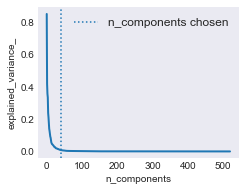

In [53]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = model_selection.GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train_norm, y_train_norm)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [54]:
estimator.best_estimator_.named_steps['pca'].n_components

40

In [55]:
estimator.best_score_

0.6864326138127911

In [56]:
y_pred = estimator.best_estimator_.predict(X_test_norm)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_norm, y_pred)
print(confusion_matrix)

[[2371 2014]
 [1190 4260]]


In [61]:
logreg = linear_model.LogisticRegression()
rfe = RFE(logreg , 40)
rfe = rfe.fit(X_train_norm,y_train_norm)

In [62]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False  True False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False False False False False False False False Fa

In [72]:
cols = [X_train_norm.columns[idx] for idx,i in enumerate(rfe.ranking_) if rfe.support_[idx] ]

In [74]:
#selected columns
cols

['ga_sessionsWithEvent',
 'ga_sessionCount',
 'ga_browser_encoded_A2',
 'ga_operatingSystemVersion_encoded_C1',
 'ga_operatingSystemVersion_encoded_C47',
 'ga_operatingSystemVersion_encoded_C57',
 'ga_operatingSystemVersion_encoded_C76',
 'ga_operatingSystemVersion_encoded_C78',
 'ga_operatingSystemVersion_encoded_C8',
 'ga_language_encoded_D3',
 'ga_language_encoded_D30',
 'ga_language_encoded_D52',
 'ga_language_encoded_D54',
 'ga_language_encoded_D73',
 'ga_language_encoded_D80',
 'ga_DeviceInfo_encoded_E110',
 'ga_DeviceInfo_encoded_E116',
 'ga_DeviceInfo_encoded_E12',
 'ga_DeviceInfo_encoded_E126',
 'ga_DeviceInfo_encoded_E137',
 'ga_DeviceInfo_encoded_E152',
 'ga_DeviceInfo_encoded_E163',
 'ga_DeviceInfo_encoded_E177',
 'ga_DeviceInfo_encoded_E215',
 'ga_DeviceInfo_encoded_E223',
 'ga_DeviceInfo_encoded_E240',
 'ga_DeviceInfo_encoded_E281',
 'ga_DeviceInfo_encoded_E309',
 'ga_DeviceInfo_encoded_E322',
 'ga_DeviceInfo_encoded_E326',
 'ga_DeviceInfo_encoded_E343',
 'ga_DeviceInfo_e

In [87]:
X_train_final = X_train_norm[cols]
y_train_final = y_train_norm
X_test_final = X_test_norm[cols]
y_test_final = y_test_norm

In [83]:
y_final.values

array([1, 1, 0, ..., 1, 0, 1])

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=500,verbose=1)
logreg.fit(X_train_norm, y_train_norm)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [96]:
y_pred = logreg.predict(X_test_norm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_norm, y_test_norm)))

Accuracy of logistic regression classifier on test set: 0.68


In [97]:
#CV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=20, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train_norm, y_train_norm, cv=kfold, scoring=scoring)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.691


In [102]:
print(confusionmatrix(y_test_norm,y_pred))

             precision    recall  f1-score   support

          0       0.67      0.55      0.60      4385
          1       0.68      0.78      0.73      5450

avg / total       0.68      0.68      0.67      9835



In [103]:
## random forest

In [109]:
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train_norm,y_train_norm)
y_pred_rf1=rf1.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_rf1))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_rf1))

             precision    recall  f1-score   support

          0       0.86      0.79      0.83      4385
          1       0.84      0.90      0.87      5450

avg / total       0.85      0.85      0.85      9835

Accuracy: 0.8518556176919166


In [138]:
rf2 = RandomForestClassifier(n_estimators=200,random_state=42)
rf2.fit(X_train_norm,y_train_norm)
y_pred_rf2=rf2.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_rf2))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_rf2))

             precision    recall  f1-score   support

          0       0.87      0.79      0.83      4385
          1       0.84      0.91      0.87      5450

avg / total       0.86      0.85      0.85      9835

Accuracy: 0.8540925266903915


In [139]:
rf3 = RandomForestClassifier(n_estimators=200,random_state=42)
rf3.fit(X_train_final,y_train_final)
y_pred_rf3=rf3.predict(X_test_final)
print(confusionmatrix(y_test_final,y_pred_rf3))
print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_rf3))

             precision    recall  f1-score   support

          0       0.69      0.53      0.60      4385
          1       0.68      0.80      0.74      5450

avg / total       0.68      0.68      0.68      9835

Accuracy: 0.683375699034062


In [143]:
rf4 = RandomForestClassifier(n_estimators=200,max_features="log2",random_state=42,oob_score=True)
rf4.fit(X_train_norm,y_train_norm)
y_pred_rf4=rf4.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_rf4))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_rf4))

             precision    recall  f1-score   support

          0       0.87      0.79      0.83      4385
          1       0.84      0.90      0.87      5450

avg / total       0.85      0.85      0.85      9835

Accuracy: 0.8532791052364006


In [145]:
rf4.oob_score_

0.8561125857665147

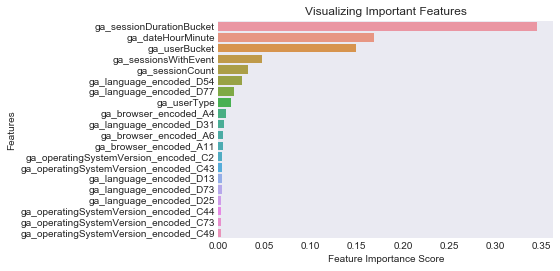

In [132]:
feature_imp = pd.Series(rf2.feature_importances_,index=X_train_norm.columns).sort_values(ascending=False)
#feature_imp

sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [170]:
#Metric

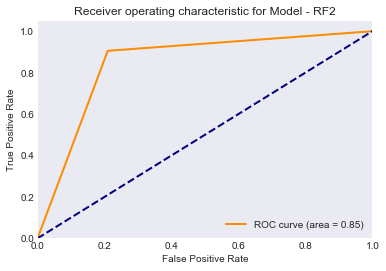

In [168]:
False_Pos_Rate,True_Pos_Rate,ROC_CURVE = roccurve(y_pred_rf2,y_test_norm)
plotroc(False_Pos_Rate,True_Pos_Rate,ROC_CURVE,'Receiver operating characteristic for Model - RF2')

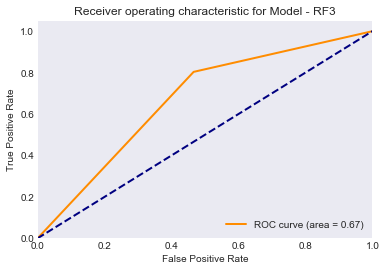

In [169]:
False_Pos_Rate,True_Pos_Rate,ROC_CURVE = roccurve(y_pred_rf3,y_test_norm)
plotroc(False_Pos_Rate,True_Pos_Rate,ROC_CURVE,'Receiver operating characteristic for Model - RF3')

In [173]:
#SVM 

In [175]:
svm1 = svm.SVC(kernel='linear') # Linear Kernel
svm1.fit(X_train_norm,y_train_norm)
y_pred_svm1 = svm1.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_svm1))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_svm1))

             precision    recall  f1-score   support

          0       0.62      0.57      0.59      4385
          1       0.67      0.71      0.69      5450

avg / total       0.65      0.65      0.65      9835

Accuracy: 0.6499237417386884


In [177]:

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=1.0,random_state=42).fit(X_train_norm, y_train_norm)

y_pred_svm2 = lin_svc.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_svm2))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_svm2))

             precision    recall  f1-score   support

          0       0.67      0.55      0.61      4385
          1       0.69      0.78      0.73      5450

avg / total       0.68      0.68      0.68      9835

Accuracy: 0.680630401626843


In [178]:
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0,random_state=42).fit(X_train_norm, y_train_norm)


y_pred_svm3 = rbf_svc.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_svm3))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_svm3))

             precision    recall  f1-score   support

          0       0.70      0.61      0.65      4385
          1       0.71      0.80      0.75      5450

avg / total       0.71      0.71      0.71      9835

Accuracy: 0.7104219623792577


In [179]:
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.0,random_state=42).fit(X_train_norm, y_train_norm)
y_pred_svm4 = poly_svc.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_svm4))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_svm4))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      4385
          1       0.55      1.00      0.71      5450

avg / total       0.31      0.55      0.40      9835

Accuracy: 0.5541433655312659


C:\Users\vbdon\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [188]:


y_pred_svm5 = rbf_svc1.predict(X_test_norm)
print(confusionmatrix(y_test_norm,y_pred_svm5))
print("Accuracy:",metrics.accuracy_score(y_test_norm, y_pred_svm5))


# 0.71 -  (c 1, g 0.8)
# 0.68  - (c 0.1 g 0.8  )
# 0.7240467717336044 - (c 10, g-1)
# 0.710930350788002 - c 10, g 10

             precision    recall  f1-score   support

          0       0.71      0.59      0.64      4385
          1       0.71      0.81      0.76      5450

avg / total       0.71      0.71      0.71      9835

Accuracy: 0.710930350788002


In [187]:
# SVC with RBF kernel
rbf_svc1 = svm.SVC(kernel='rbf', gamma=10, C=10,random_state=42).fit(X_train_norm, y_train_norm)


In [243]:
## neural network
epochs = 500
batch_size = 128
dropout_rate = 0.4
model1 = model_NN(X_train_nn.shape[1],dropout_rate)
print(model1.summary())
model1 = train_NN(model1,X_train_nn,y_train_nn,epochs,batch_size)
eval_NN(model1,X_test_nn,y_test_nn)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 300)               156600    
_________________________________________________________________
dense_104 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_105 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_106 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_107 (Dense)            (None, 50)                4050      
_________________________________________________________________
dense_108 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_109 (Dense)            (None, 20)                620       
__________

20115/20115 [==============================] - 3s 132us/step - loss: 0.1200 - acc: 0.9471 - val_loss: 0.7981 - val_acc: 0.8249
Epoch 107/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.1259 - acc: 0.9451 - val_loss: 0.8303 - val_acc: 0.8248
Epoch 108/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.1176 - acc: 0.9481 - val_loss: 0.8323 - val_acc: 0.8228
Epoch 109/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.1206 - acc: 0.9465 - val_loss: 0.8136 - val_acc: 0.8243
Epoch 110/500
20115/20115 [==============================] - 3s 133us/step - loss: 0.1179 - acc: 0.9471 - val_loss: 0.8309 - val_acc: 0.8161
Epoch 111/500
20115/20115 [==============================] - 3s 133us/step - loss: 0.1180 - acc: 0.9470 - val_loss: 0.8444 - val_acc: 0.8224
Epoch 112/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.1184 - acc: 0.9471 - val_loss: 0.9431 - val_acc: 0.8261
Epoch 113/500
20115/20115 [

20115/20115 [==============================] - 3s 131us/step - loss: 0.0739 - acc: 0.9675 - val_loss: 1.0442 - val_acc: 0.8318
Epoch 223/500
20115/20115 [==============================] - 3s 131us/step - loss: 0.0742 - acc: 0.9685 - val_loss: 0.9552 - val_acc: 0.8310
Epoch 224/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.0722 - acc: 0.9684 - val_loss: 0.8868 - val_acc: 0.8282
Epoch 225/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.0706 - acc: 0.9694 - val_loss: 1.0417 - val_acc: 0.8336
Epoch 226/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.0706 - acc: 0.9697 - val_loss: 1.0812 - val_acc: 0.8264
Epoch 227/500
20115/20115 [==============================] - 3s 131us/step - loss: 0.0671 - acc: 0.9712 - val_loss: 1.0364 - val_acc: 0.8305
Epoch 228/500
20115/20115 [==============================] - 3s 126us/step - loss: 0.0661 - acc: 0.9721 - val_loss: 1.0182 - val_acc: 0.8328
Epoch 229/500
20115/20115 [

20115/20115 [==============================] - 3s 130us/step - loss: 0.0580 - acc: 0.9760 - val_loss: 0.9525 - val_acc: 0.8305
Epoch 339/500
20115/20115 [==============================] - 3s 132us/step - loss: 0.0559 - acc: 0.9766 - val_loss: 0.9190 - val_acc: 0.8378
Epoch 340/500
20115/20115 [==============================] - 3s 133us/step - loss: 0.0601 - acc: 0.9757 - val_loss: 0.9882 - val_acc: 0.8334
Epoch 341/500
20115/20115 [==============================] - 3s 141us/step - loss: 0.0632 - acc: 0.9752 - val_loss: 0.9476 - val_acc: 0.8315
Epoch 342/500
20115/20115 [==============================] - 2s 106us/step - loss: 0.0600 - acc: 0.9738 - val_loss: 0.9742 - val_acc: 0.8352
Epoch 343/500
20115/20115 [==============================] - 2s 107us/step - loss: 0.0557 - acc: 0.9773 - val_loss: 1.0207 - val_acc: 0.8355
Epoch 344/500
20115/20115 [==============================] - 2s 94us/step - loss: 0.0529 - acc: 0.9791 - val_loss: 1.1022 - val_acc: 0.8358
Epoch 345/500
20115/20115 [=

20115/20115 [==============================] - 2s 99us/step - loss: 0.0434 - acc: 0.9816 - val_loss: 1.1001 - val_acc: 0.8324
Epoch 455/500
20115/20115 [==============================] - 2s 100us/step - loss: 0.0449 - acc: 0.9817 - val_loss: 1.1506 - val_acc: 0.8331
Epoch 456/500
20115/20115 [==============================] - 2s 98us/step - loss: 0.0477 - acc: 0.9826 - val_loss: 0.9619 - val_acc: 0.8364
Epoch 457/500
20115/20115 [==============================] - 2s 96us/step - loss: 0.0411 - acc: 0.9841 - val_loss: 0.9383 - val_acc: 0.8379
Epoch 458/500
20115/20115 [==============================] - 2s 100us/step - loss: 0.0443 - acc: 0.9821 - val_loss: 1.0731 - val_acc: 0.8345
Epoch 459/500
20115/20115 [==============================] - 2s 97us/step - loss: 0.0401 - acc: 0.9839 - val_loss: 1.1507 - val_acc: 0.8305
Epoch 460/500
20115/20115 [==============================] - 2s 97us/step - loss: 0.0409 - acc: 0.9830 - val_loss: 1.1514 - val_acc: 0.8345
Epoch 461/500
20115/20115 [=====

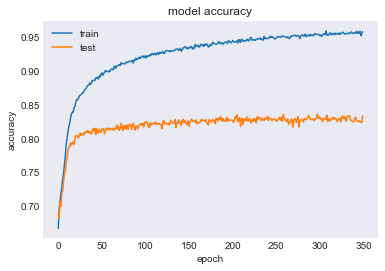

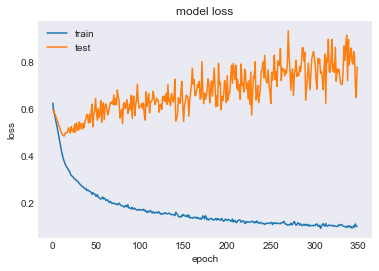

In [241]:
plotgraphs(model1.model.history)

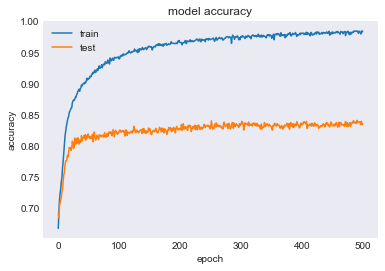

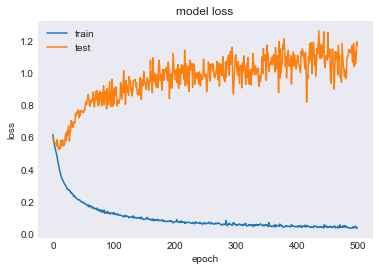

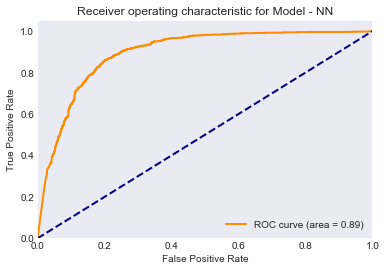

Saved model to disk


In [249]:
#Total params: 251,401
#cv score - 83.26%
plotgraphs(model1.model.history)
y_pred_nn = model1.predict(X_test_nn)
False_Pos_Rate,True_Pos_Rate,ROC_CURVE = roccurve(y_pred_nn,y_test_nn)
plotroc(False_Pos_Rate,True_Pos_Rate,ROC_CURVE,'Receiver operating characteristic for Model - NN')
yaml_filename = 'model1_500.yaml'
hd5_filename= 'model1_500.hd5'
savemodel(model1,yaml_filename,hd5_filename)

In [262]:
X_train_nn.shape

(26821, 521)

In [269]:
## neural network
epochs = 400
batch_size = 256
learning_rate = 0.1
momentum  = 0.7
decay_rate = learning_rate / epochs
model2 = model_NN2(X_train_nn.shape[1],learning_rate,momentum,decay_rate)
print(model2.summary())
model2 = train_NN(model2,X_train_nn,y_train_nn,epochs,batch_size)
eval_NN(model2,X_test_nn,y_test_nn)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 300)               156600    
_________________________________________________________________
dense_158 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_159 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_160 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_161 (Dense)            (None, 50)                4050      
_________________________________________________________________
dense_162 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_163 (Dense)            (None, 20)                620       
__________

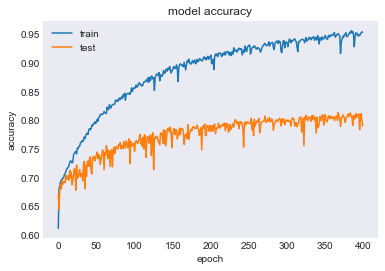

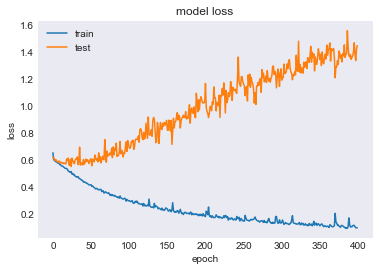

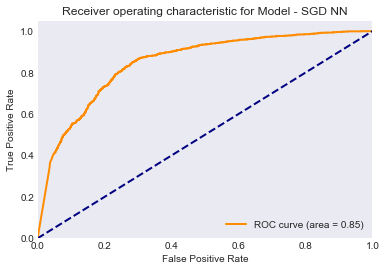

In [270]:
#post training ...
plotgraphs(model2.model.history)
y_pred_nn = model2.predict(X_test_nn)
False_Pos_Rate,True_Pos_Rate,ROC_CURVE = roccurve(y_pred_nn,y_test_nn)
plotroc(False_Pos_Rate,True_Pos_Rate,ROC_CURVE,'Receiver operating characteristic for Model - SGD NN')
yaml_filename = 'model2_500.yaml'
hd5_filename= 'model2_500.hd5'
#savemodel(model1,yaml_filename,hd5_filename)

In [272]:
#XGBOOST


Model Report
Accuracy : 0.8396
AUC Score (Test): 0.911119


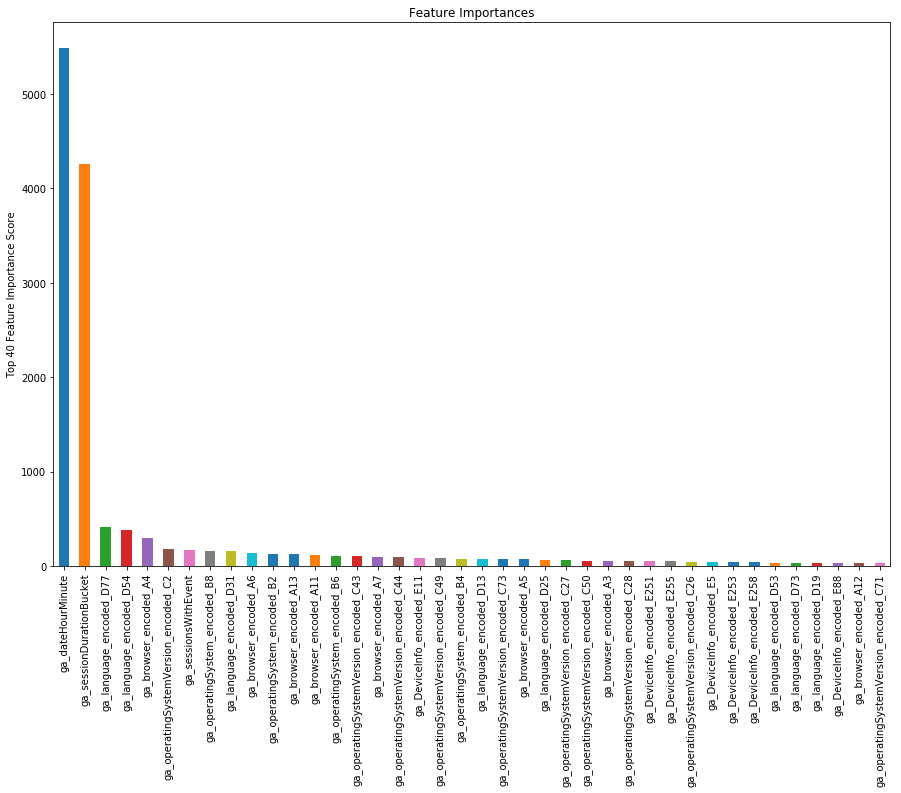

In [61]:

#Choose all predictors except target & IDcols

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgmodel1 = modelfit(xgb1,X1_train_norm, y1_train_norm)
xgeval(xgmodel1,X1_test_norm,y1_test_norm)


Model Report
Accuracy : 0.8413
AUC Score (Test): 0.911550


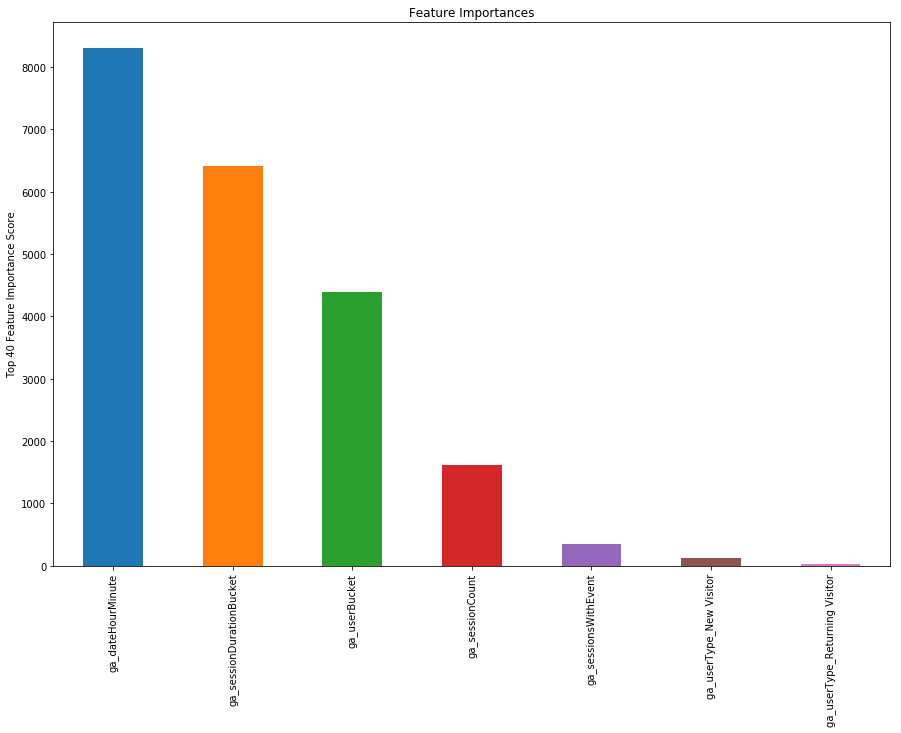

In [62]:
#Choose all predictors except target & IDcols

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgmodel2 = modelfit(xgb2,X2_train_norm, y2_train_norm)
xgeval(xgmodel2,X2_test_norm,y2_test_norm)

## function definitions

In [46]:
def roccurve(y_score,y_test):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Compute micro-average ROC curve and ROC area
    return fpr,tpr,roc_auc

def plotroc(fpr,tpr,roc_auc,model_text):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_text)
    plt.legend(loc="lower right")
    plt.show()

In [47]:
def confusionmatrix(y_test,y_pred):
    return classification_report(y_test, y_pred)

In [48]:
def model_NN(input_shape,dropout_rate):
    
    # create model
    model = Sequential()
    model.add(Dense(300, input_dim=input_shape, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(50, activation='relu'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='relu'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def model_NN2(input_shape,learn_rate,momentum,decay_rate):
    
    # create model with stochastic gradient descent optimizer
    model = Sequential()
    model.add(Dense(300, input_dim=input_shape, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(50, activation='relu'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='relu'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum,decay=decay_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
    
def train_NN(model,X_train,y_train,epochs,batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.25,verbose=0)
    return model

def eval_NN(model,X_test,y_test):
    # evaluate the model
    scores = model.evaluate(X_test, y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

def plotgraphs(model):
    # list all data in history
#    print(model.model.keys())
    # summarize history for accuracy
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def savemodel(model,yaml_filename,hd5_filename):
    # serialize model to YAML
    model_yaml = model.to_yaml()
    with open(yaml_filename, "w") as yaml_file:
        yaml_file.write(model_yaml)
    # serialize weights to HDF5
    model.save_weights(hd5_filename)
    print("Saved model to disk")

In [49]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=predictors)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain,predictors,eval_metric='auc')
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp[:40].plot(kind='bar', title='Feature Importances',figsize=(15,10))
    plt.ylabel('Top 40 Feature Importance Score')
    plt.xticks(fontsize=10)
    return alg
def xgeval(alg,dtest,predictors):       
    #Predict training set:
    dtest_predictions = alg.predict(dtest)
    dtest_predprob = alg.predict_proba(dtest)[:,1]        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(predictors, dtest_predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(predictors, dtest_predprob))
                    
